# Selecionar variáveis para a arvore de decisão utilizando o Algoritmo Genético

Neste notebook exploramos os métodos de selelçao de variáveis utilizando uma busca genética.

Até agora utilizamos apenas os algoritmos e funções do [Scikitlearn](http://scikit-learn.org/), porém não existe otimização de variáveis utilizando busca genética por padrão no SkLearn. Então, recorremos à uma inteface entre o [DEAP](http://deap.readthedocs.io/en/master/) (Distributed Evolutionary Algorithms in Python) e SkLearn escrita por [Manuel Calzolari](https://github.com/manuel-calzolari/sklearn-genetic).

Para utilizar o DEAP com Anaconda antes é recomen instalar o pacote com o seguinte comando:
`conda install -c conda-forge deap`

### Carregar as bibliotécas necessárias

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from genetic_selection import GeneticSelectionCV # https://github.com/manuel-calzolari/sklearn-genetic

### Carregar as bases de dados

Neste caso carregamos apenas as que obtiveram os melhores resultados na etapa de escolha de estratégias.

In [2]:
training_mean = pd.read_csv("data/training_mean.csv").set_index('sessionNo')
testing_mean = pd.read_csv("data/testing_mean.csv").set_index('sessionNo')

## Funções auxiliares

### Separar um dataframe em um vetor de características e  um vetor de classe

In [4]:
def splitData(df):
    x = df.iloc[:, :-1]
    y = df['order']
    return x, y

### Calcular a acurácia do modelo dados dataframes de treinamento e teste

In [16]:
def accDecisionTree(df_train, df_test):
    x_train, y_train = splitData(df_train)
    x_test, y_test = splitData(df_test)
    tree.fit(x_train,y_train)
    return tree.score(x_test, y_test)

### Realizar a busca genética

Retorna um vetor booleano que indica quais variáveis devem ser utilizadas para melhorar a acurácia do modelo.

In [6]:
def geneticSearch(df, estimator, population, crossover, generations, mutation):
    X = df.iloc[:,:-1].values
    y = df.iloc[:,-1].values
    selector = GeneticSelectionCV(estimator,
                                  cv=3,
                                  verbose=0,
                                  scoring="accuracy",
                                  n_population=population,
                                  crossover_proba=crossover,
                                  mutation_proba=mutation,
                                  n_generations=generations,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  caching=True,
                                  n_jobs=-1)
    selector = selector.fit(X, y)
    return selector

### Construir o vetor de acurácias

Retorna um vetor de acurácias, a maior acurácia e a máscara de seleção de variáveis

In [13]:
def makeErrors(selectors):
    accs = []
    maxi = 0.
    best = 0 
    for i in range(len(selectors)):
            df_train = training_mean.copy()
            df_test = testing_mean.copy()
            for j in range(len(training_mean.columns)-1):
                if(not selectors[i][j]):
                    del df_train[training_mean.columns[j]]
                    del df_test[training_mean.columns[j]]
            acc = accDecisionTree(df_train,df_test)
            if(acc > maxi):
                maxi = acc
                best = i
            accs.append(acc)
    return accs, maxi, selectors[best]

## Experimentos

### Instancia da árvore de decisão utilizada em todas as funções

In [9]:
tree = DecisionTreeClassifier(criterion='entropy',random_state=0)

### Variando a quantidade de gerações entre 5 e 100 a passo 5

In [76]:
selectors = []
for g in range(5, 100, 5):
    selector = geneticSearch(training_mean,tree,25,0.6,g,0.01)
    selectors.append(selector.support_)

accs, maxi, best = makeErrors(selectors)

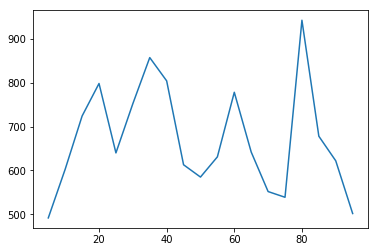

492.0

In [17]:
plt.plot(list(range(5,100,5)),accs)
plt.show()
print('Maior acurácia: ' + str(maxi))
print('Mascara de seletores: ' best)

### Variando a quantidade de gerações entre 5 e 500 passo 5

In [16]:
selectors = []
for g in range(5, 500, 5):
    selector = geneticSearch(training_mean,tree,25,0.6,g,0.01)
    selectors.append(selector.support_)

accs, maxi, best = makeErrors(selectors)

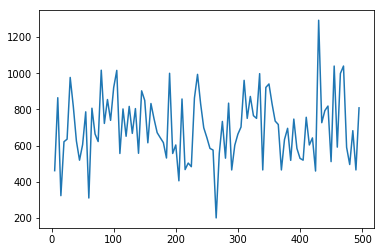

201.0

In [12]:
plt.plot(list(range(5,500,5)),accs)
plt.show()
print('Maior acurácia: ' + str(maxi))
print('Mascara de seletores: ' best)

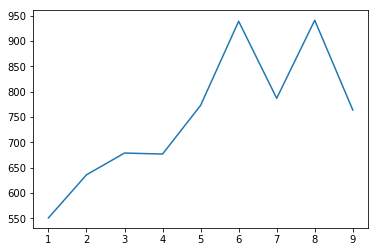

551.0

In [18]:
plt.plot(list(range(1,10,1)),erros)
plt.show()
min(erros)

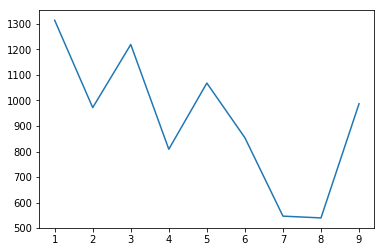

540.0

In [23]:
# função gini
plt.plot(list(range(1,10,1)),erros)
plt.show()
min(erros)

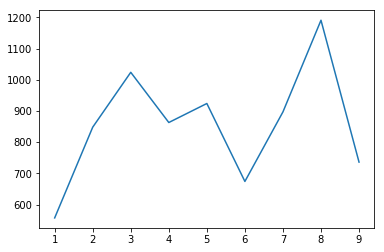

557.0

In [26]:
# função gini de novo
plt.plot(list(range(1,10,1)),erros)
plt.show()
min(erros)

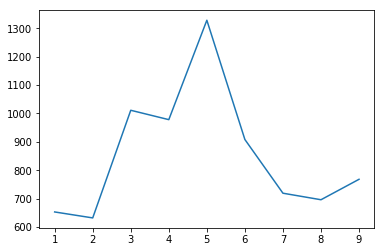

632.0

In [29]:
# 30 indivíduos gini
plt.plot(list(range(1,10,1)),erros)
plt.show()
min(erros)

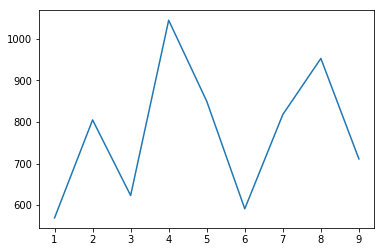

569.0

In [32]:
# 30 indivíduos gini mais uma vez
plt.plot(list(range(1,10,1)),erros)
plt.show()
min(erros)

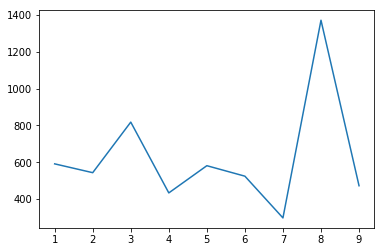

297.0

In [35]:
# 300 indivíduos gini
plt.plot(list(range(1,10,1)),erros)
plt.show()
min(erros)

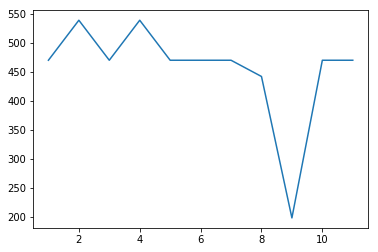

198.0

In [41]:
# 300 indivíduos gini 30-40 gerações
plt.plot(list(range(1,12,1)),erros)
plt.show()
min(erros)

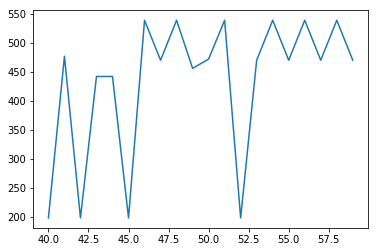

198.0

In [49]:
# 300 indivíduos gini 40-60 gerações
plt.plot(list(range(40,60)),erros)
plt.show()
min(erros)

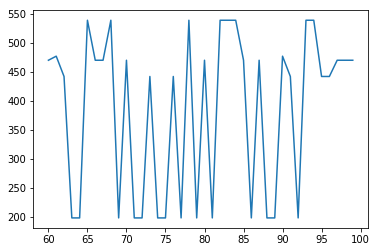

198.0

In [52]:
# 300 indivíduos 40-60 gerações
plt.plot(list(range(60,100,1)),erros)
plt.show()
min(erros)

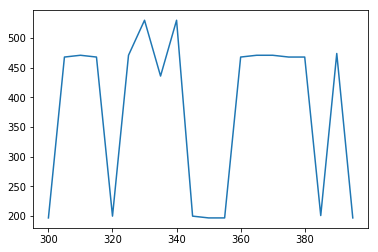

197.0

In [59]:
# 40 gerações indivíduos 300-400, salto 5 gerações
plt.plot(list(range(300,400,5)),erros)
plt.show()
min(erros)

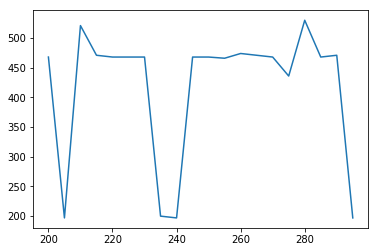

197.0

In [62]:
# 40 gerações indivíduos 200-300, salto 5 gerações
plt.plot(list(range(200,300,5)),erros)
plt.show()
min(erros)

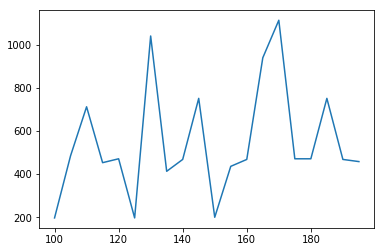

197.0

In [65]:
# 40 gerações indivíduos 100-200, salto 5 gerações
plt.plot(list(range(100,200,5)),erros)
plt.show()
min(erros)

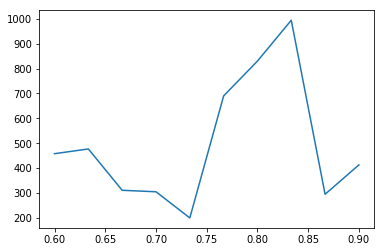

200.0

In [70]:
# 40 gerações indivíduos 100, variando taxa de cross over salto 5 gerações
plt.plot(np.linspace(0.6, 0.9, 10),erros)
plt.show()
min(erros)

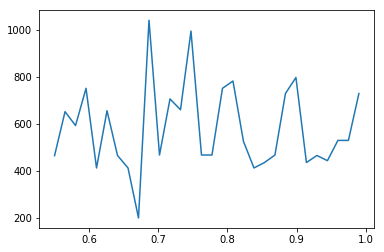

201.0

In [73]:
# 40 gerações indivíduos 100, variando taxa de cross over salto 5 gerações
plt.plot(np.linspace(0.55, 0.99, 30),erros)
plt.show()
min(erros)

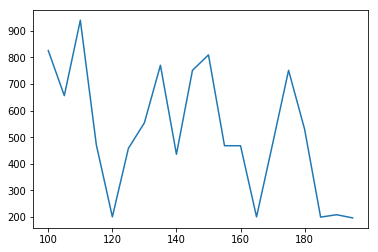

197.0

In [80]:
list(range(100, 200, 5))
# 40 gerações indivíduos 100-200 pxo = 0.671
plt.plot(list(range(100, 200, 5)),erros)
plt.show()
min(erros)

In [17]:
selectors = []
for m in np.linspace(0.01, 0.20, 20):
    selector = geneticSearch(training_mean,tree,25,0.671,40,m)
    selectors.append(selector.support_)

accs, maxi, best = makeErrors(selectors)

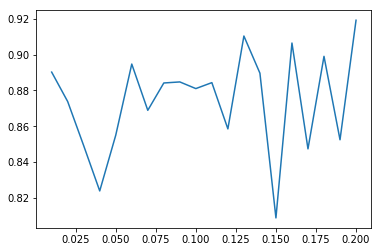

Maior acurácia: 0.919193895519
Mascara de seletores: [False False False False False False False  True  True False False  True
 False  True False False False False False False False]


In [19]:
plt.plot(np.linspace(0.01, 0.20, 20),accs)
plt.show()
print('Maior acurácia: ' + str(maxi))
print('Mascara de seletores: ' + str(best))